In [3]:
%%time

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',105)
# columns_df

Wall time: 347 ms


In [4]:
%%time

# Prints the current workinig directory
os.getcwd()
# os.listdir()

Wall time: 0 ns


'C:\\Users\\fahad\\Documents\\GitHub\\Deep-Learning-for-Wheat-Yield-Prediction'

# ToDo:  
  
2019 2020 data is fine  
Cant use 2017 because of the blue band  
Distt is not normal in 2018 robot  
AREA UNDER THE CURVE in each season for 2018 2017  

## Importing Data

In [5]:
%%time

path = r'C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021'
# path = path.replace("\\", "/")+'/'
os.listdir(path)

Wall time: 0 ns


['Graminor_2019', 'Masbasis_2019', 'Staur_2019', 'Vollebekke-total_2020']

## Creating list of all files

In [6]:
%%time

# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
# len(files_with_address)
# files_with_address
# files_list

Wall time: 3.99 ms


### Check for duplicate filenames

In [7]:
%%time

print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list)- len(set(files_list)),'duplicate file name/names.')

Total number of files are : 75
Number of unique file names are: 74
There is/are 1 duplicate file name/names.
Wall time: 998 µs


### Get all the files with their paths from the data directory in a dict

In [8]:
%%time

file_w_address_test = files_with_address[1]

# Get filename from path
os.path.basename(file_w_address_test)

# Get directory path name from path
os.path.dirname(file_w_address_test)

# Get directory name from path
os.path.basename(os.path.dirname(file_w_address_test))

# File name without extension
os.path.splitext(os.path.basename(file_w_address_test))[0]

# File Extension
os.path.splitext(os.path.basename(file_w_address_test))[1]

Wall time: 998 µs


'.xlsx'

## Checking if there are multiple sheets in the files

In [9]:
%%time

# Print number of sheets in all files
print('The following files have multiple sheets.')

list_multi_sheet = []
for file in files_with_address:
    
    xl_file = pd.ExcelFile(file,engine='openpyxl')
    number_of_sheets = len(xl_file.sheet_names)
    if number_of_sheets > 1:
        print(number_of_sheets, os.path.basename(file), 'in folder', os.path.basename(os.path.dirname(file))
)
        list_multi_sheet.append(file)

The following files have multiple sheets.
4 19TvPhenores.xlsx in folder Graminor_2019
4 19TvPhenores.xlsx in folder Staur_2019
3 20BMLGI1_2020_tm.xlsx in folder Masbasis
3 Masbasis_Mica_2020_all_dates_MEDIAN_DP.xlsx in folder Masbasis
3 ROBOT_2020.xlsx in folder Robot
Wall time: 8.1 s


In [10]:
%%time

# Removing files with multiple sheets from the list

for i in list_multi_sheet:
    files_with_address.remove(i)
len(files_with_address)

Wall time: 0 ns


70

## Filding files without dates
(with 2019 in name means they dont have date format)

In [11]:
%%time

files_w_2019 = []
for file in files_with_address:
    file_name = os.path.basename(file)
    if '2019' in file_name:
        print(file_name, 'in folder', os.path.basename(os.path.dirname(file)))
        files_w_2019.append(file)

Field_data_2019.xlsx in folder Masbasis_2019
Masbasis_2019_ForDP_median.xlsx in folder Masbasis_2019
Staur_Graminor_2019_median.xlsx in folder Staur_2019
Staur_Masbasis_2019.xlsx in folder Staur_2019
Wall time: 1.99 ms


In [12]:
%%time

# Removing from list
for i in files_w_2019:
    print(i)
    files_with_address.remove(i)

C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Masbasis_2019\Field_data_2019.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Masbasis_2019\Masbasis_2019_ForDP_median.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Staur_2019\Staur_Graminor_2019_median.xlsx
C:\Users\fahad\Documents\Master Thesis\Phenotyping\Data\Feb2021\Staur_2019\Staur_Masbasis_2019.xlsx
Wall time: 0 ns


In [13]:
%%time

len(files_with_address)
# files_with_address

Wall time: 0 ns


66

## Importing data files to Pandas

In [14]:
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

#     # Parent dir
#     dir1_name = os.path.basename(os.path.dirname(data))
#     # grand parent dir
#     dir2_name = os.path.basename(os.path.dirname(os.path.dirname(data)))

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(")", "")

    all_df.append(df_name)

    print(df_name)
    locals()[df_name] = pd.read_excel(data, engine='openpyxl')
# all_df

Graminor_070819_2
Graminor_150819
Graminor_east_050819
Graminor_west_050819
Graminor-250719
Graminor_050719
Graminor_150719
Graminor_220719_corrected
Graminor_east_020719
Graminor_east_110719
Graminor_west_020719
Graminor_060619
Graminor_110619
Graminor_280619_corrected
Graminor_east_250619_corrected
Graminor_west_250619_correct
Graminor_east_010720
Graminor_east_040720
Graminor_east_040820
Graminor_east_070720_correct
Graminor_east_090720
Graminor_east_130720
Graminor_east_140820
Graminor_east_170720.cpg
Graminor_east_180620
Graminor_east_200720
Graminor_east_240620_correct
Graminor_east_300720.shp
Graminor_Mica_west_240620
Graminor_west_040720
Graminor_west_040820
Graminor_west_070720
Graminor_west_070720_correct
Graminor_west_090720
Graminor_west_130720
Graminor_west_140820
Graminor_west_300720
Masbasis_Mica_070820
Masbasis_Mica_120820
Masbasis_Mica_140820
Masbasis_Mica_010720
Masbasis_Mica_080720
Masbasis_Mica_130720
Masbasis_mica_170720
Masbasis_Mica_220720
Masbasis_Mica_300720
Ma

## Should I consider Dropping NAN? If any???

## Check which df have the data column heading we need

In [15]:
%%time

columns_req = []

find_cols_mean = ['id', 'bluemea', 'greenme', 'redmea', 'reded', 'NIRmea', 'NDVImea', 'MTCImea']
# 'RedEdge_2'

find_cols_median = ['id', 'bluemed', 'greenmed', 'redmed', 'reded', 'NIRmed', 'NDVImed', 'MTCImed']
# 'RedEdge_3'

std_cols = ['plot', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'grain', 'yield']

len(all_df)

Wall time: 0 ns


66

### Listing headings into df

In [16]:
%%time

# Finding max number of columns in all df

len_columns = []
for df in all_df:
    cols_df = locals()[df].columns
    len_columns.append(len(cols_df))
max_cols_in_df = max(len_columns)

# Now creating a empty df to collect all column headings
columns_df = pd.DataFrame(data=range(0,max_cols_in_df), columns = ['ID'])
columns_df.drop('ID', axis=1, inplace=True)

for df in all_df:
    cols_df = locals()[df].columns
    columns_df[df] = pd.Series(cols_df)


Wall time: 49.9 ms


### Convert columns_df to dictoionary

In [17]:
%%time

# Function to convert df to dict while dropping nan in each column separately

def comp_dropna(df1):
    return {k: v.dropna().to_dict() for k,v in df1.items()}

columns_dict = comp_dropna(columns_df)


Wall time: 9.97 ms


## Finding Max Colum heading with the text we are looking for in

In [18]:
%%time

# Find columns with key from the following list
# Rename the founc columns to the values against the keys
find_cols = {
    'id': 'Plot_ID',
    'Blue': 'Blue',
    'Gre': 'Green',
    'Red': 'Red',
    'RedE': 'RedEdge',
    'NIR': 'NIR',
    'NDVI': 'NDVI',
    'MTCI': 'MTCI'
}

dtype_f = {0: '_Mean_Value', 1: '_Median_Value', 2: '_Std_Dev_Value'}
num_std_dtype_colunms = len(dtype_f)

list_ok_df_per_query = []
list_problem_df_per_query = []

for query, query_f in find_cols.items():
    
    # First, we loop through all df to find the max of number of relavant columns in any df
    num_col_found_all = []
    for df, cols_dict in columns_dict.items():

        # List to save the relavant columns found in the df
        cols_found = []
        
        # Loop through all column names
        for key, item in cols_dict.items():
            
            # Check if required text is in colmn name,i.e. item
            
            # Ensure first that the text does not contain 'count' and 'sum' in it
            if item.lower().find('sum'.lower()) == -1 and item.lower().find('count'.lower()) == -1:
            
                # When searching for Red, search for red but ignore RedEdge,i.e. RedE
                if query.lower()=='red':
                    if item.lower().find(query.lower()) != -1 and item.lower().find('RedE'.lower()) == -1:
                        cols_found.append(item)

                # For the rest also checking we do not get 'GNDVI' columns. Don't neet them yet
                elif item.lower().find(query.lower()) != -1 and item.lower().find('GNDVI'.lower()) == -1:
                    cols_found.append(item)

        num_col_found_all.append(len(cols_found))
    max_cols = max(num_col_found_all)
    print(query, max_cols)

    # Define a df for saving the columns found if num of col is not num_std_dtype_colunms
    temp_df_non_std_cols = 'col_df_non_std_cols_'+query
    locals()[temp_df_non_std_cols] = pd.DataFrame(data=range(0,max_cols), columns = [query])
    list_problem_df_per_query.append(temp_df_non_std_cols)
    
    # Define a df for saving the columns found if num of col is num_std_dtype_colunms
    temp_df_std_cols= 'col_df_std_cols_'+query
    locals()[temp_df_std_cols] = pd.DataFrame(data=range(0,num_std_dtype_colunms), columns = [query])
    list_ok_df_per_query.append(temp_df_std_cols)
    
    
    
    # Now we again loop and append those columns to a relavant df for each query
    
    for df, cols_dict in columns_dict.items():

        # List to save the relavant columns found in the df
        cols_found = []

        # Loop through all column names
        for key, item in cols_dict.items():

            # Check if required text is in colmn name,i.e. item
            
            # Ensure first that the text does not contain 'count' and 'sum' in it
            if item.lower().find('sum'.lower()) == -1 and item.lower().find('count'.lower()) == -1:
            
                # When searching for Red, search for red but ignore RedEdge,i.e. RedE
                if query.lower()=='red':
                    if item.lower().find(query.lower()) != -1 and item.lower().find('RedE'.lower()) == -1:
                        cols_found.append(item)

                # For the rest also checking we do not get 'GNDVI' columns. Don't neet them yet
                elif item.lower().find(query.lower()) != -1 and item.lower().find('GNDVI'.lower()) == -1:
                    cols_found.append(item)


        # Adding the found values to a column in dataframe
        if len(cols_found) != num_std_dtype_colunms and query != 'id'.lower():
            locals()[temp_df_non_std_cols][df] = pd.Series(cols_found)
        
        if len(cols_found) == num_std_dtype_colunms or query=='id'.lower():
            locals()[temp_df_std_cols][df] = pd.Series(cols_found)
            
        if query=='id':
            num_id_cols = len(cols_found)
            if num_id_cols !=1:
                if num_id_cols == 0:
                    print('Error: ID column not found in' ,df)
                else:
                    print('Error: More than one ID column found in ' ,df)
    
    # Dropping the query column from the dataframe
    locals()[temp_df_non_std_cols].drop(query, axis=1, inplace=True)
    locals()[temp_df_std_cols].drop(query, axis=1, inplace=True)
    
    # Drop extra rows if the query is id
    # Assumption: There is only one id columns in each df
    # Assumption being checked in previous loop
    if query =='id':
        locals()[temp_df_std_cols].drop([1, 2], axis=0, inplace=True)
    
    
    
    
    
#     # ===========================Start_of_Analysis_1================================
#     # Analysis Part: Uncomment for new data
#     # Confirm if all row elements corresopnd to data aggregation types in the dict
    
    
#     agg_types_dict = {0:'mea', 1:'med', 2:'st'}
    
#     if query =='id':
#         pass
#     else:
#         for key, agg_type in agg_types_dict.items():
#             check_df = locals()[temp_df_std_cols]#.drop(query, axis=1)
#             for row_item in check_df.iloc[key].tolist():
#                 if row_item.lower().find(agg_type) == -1:
#                     print(row_item, key, agg_type)
                
#     print(query, locals()[temp_df_std_cols].shape)
#     display(locals()[temp_df_std_cols])
    
#     # Analysis shows that for df with num_std_dtype_colunms relavant column names; 
#     # green and RedEdge columns have naming problems where the agg_types are
#     # not the same for mea and med for some green columns
#     # and mea, med, and st for most of the RedEdge columns
#     # =============================End_of_Analysis_1================================





    # ===========================Start_of_Analysis_2================================
    # Analysis Part: Uncomment for new data
    # Renaming the column names to standard names 
    # Renaming based on the rule that the first name is mean, second is median and 
    # the third is standard deviation.
    # This assumption has been partially checked and confirmed in Analysis_1
    
    # The id column has to be dealed separately since it does not have 
    # num_std_dtype_colunms variations i.e. mean, median, and std_dev
    df_found_correct_cols = locals()[temp_df_std_cols].shape[1]
    renamed_count = 0
    if query=='id':
        for x, y in locals()[temp_df_std_cols].items():
            locals()[x].rename({y[0]: query_f}, axis=1, inplace=True)
#             print(f'Renamed {query_f} column for dataframe {x}')
            renamed_count += 1

    else:
        for x, y in locals()[temp_df_std_cols].items():
            locals()[x].rename({y[0]: query_f+dtype_f[0], y[1]: query_f+dtype_f[1],\
                                y[2]: query_f+dtype_f[2]}, axis=1, inplace=True)
#             print(f'Renamed {query_f} columns for dataframe {x}')
            renamed_count += 1
    print(f'{query_f} column renamed in {renamed_count} of {df_found_correct_cols} found dataframes')
#     display(locals()[temp_df_std_cols].shape[2])
    
    # =============================End_of_Analysis_2================================

    
    
    
    
    
    
#     # ===========================Start_of_Analysis_3================================
#     # Analysis Part: Uncomment for new data
#     # Checking the uncommon column names/combination or df with extra columns that 
#     # make finding the correct data confusing

#     print(temp_df_non_std_cols)
#     display(locals()[temp_df_non_std_cols])
    
    
#     # After manual analysis, found the followind
#     # Graminor_070819 (2): Green data columns are twice 
#     #      Drop the following: drop _Greenme_1, _Greenme_2, _Greenst_1
#     # Graminor_east_010720: Blue Mean twice 
#     #      drop: _Bluemean
#     # Masbasis_Mica_130720: MTCI Double 
#     #      drop: _MTCImea_1, _MTCImed_1, _MTCIstd_1
#     #
#     # More incomplete dsecrepencies
#     # Graminor_east_090720: In addition to other data,
#     #      drop: _Bluemean

#     # =============================End_of_Analysis_3================================
    




id 1
Plot_ID column renamed in 66 of 66 found dataframes
Blue 7
Blue column renamed in 61 of 61 found dataframes
Gre 6
Green column renamed in 61 of 61 found dataframes
Red 6
Red column renamed in 62 of 62 found dataframes
RedE 6
RedEdge column renamed in 62 of 62 found dataframes
NIR 6
NIR column renamed in 60 of 60 found dataframes
NDVI 6
NDVI column renamed in 62 of 62 found dataframes
MTCI 6
MTCI column renamed in 61 of 61 found dataframes
Wall time: 590 ms


<timed exec>:89: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


### List of df with problems

In [19]:
%%time

list_problem_df_per_query
problem_df = []
for df in list_problem_df_per_query:
    problem_df.extend(locals()[df].columns)
set(problem_df)

Wall time: 0 ns


{'Graminor_070819_2',
 'Graminor_220719_corrected',
 'Graminor_east_010720',
 'Graminor_east_090720',
 'Graminor_east_250619_corrected',
 'Graminor_west_020719',
 'Masbasis_Mica_130720',
 'Robot_Mica_070820',
 'Robot_Mica_140820',
 'Robot_Mica_160720'}

Dataframes with Problems

 'Graminor_070819_2'  
 'Graminor_220719_corrected'  
 'Graminor_east_010720'  
 'Graminor_east_090720'  
 'Graminor_east_250619_corrected'  
 'Graminor_west_020719'  
 'Masbasis_Mica_130720'  
 'Robot_Mica_070820'  
 'Robot_Mica_140820'  
 'Robot_Mica_160720'  

## Get list of df with all required columns after standard names implemented

### List down standard column names

In [20]:
%%time

std_columns = []
std_columns_mean = []
std_columns_median = []
std_columns_stdev = []

for key, value in find_cols.items():
    if key=='id':
        std_columns.append(value)
        std_columns_mean.append(value)
        std_columns_median.append(value)
        std_columns_stdev.append(value)

    else:
        std_columns.extend([value+y for x, y in dtype_f.items()])
        std_columns_mean.append(value+dtype_f[0])
        std_columns_median.append(value+dtype_f[1])
        std_columns_stdev.append(value+dtype_f[2])
        
# std_columns
# std_columns_mean
# std_columns_median
# std_columns_stdev

Wall time: 0 ns


Standard Columns Names  
'Plot_ID'  
'Blue_Mean_Value'  
'Blue_Median_Value'  
'Blue_Std_Dev_Value'  
'Green_Mean_Value'  
'Green_Median_Value'  
'Green_Std_Dev_Value'  
'Red_Mean_Value'  
'Red_Median_Value'  
'Red_Std_Dev_Value'  
'RedEdge_Mean_Value'  
'RedEdge_Median_Value'  
'RedEdge_Std_Dev_Value'  
'NIR_Mean_Value'  
'NIR_Median_Value'  
'NIR_Std_Dev_Value'  
'NDVI_Mean_Value'  
'NDVI_Median_Value'  
'NDVI_Std_Dev_Value'  
'MTCI_Mean_Value'  
'MTCI_Median_Value'  
'MTCI_Std_Dev_Value'  

### Find df which have all the std columns

In [21]:
%%time

count = 0
complete_dataframes = []
for df in all_df:
    df_columns = locals()[df].columns
    if (all(x in df_columns for x in std_columns)):
        complete_dataframes.append(df)
        count += 1
print(f'Found {count} complete dataframes. Can be accessed using \"complete_dataframes\" list')

Found 56 complete dataframes. Can be accessed using "complete_dataframes" list
Wall time: 3.99 ms


### Standardizing the names and dropping extra columns from complete dataframes
### Creating a dictionary with all dates for a certain field for a certain year

In [22]:
%%time

elements_to_strip = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-()."

complete_df_std = []

field_year_dict = {}

for df in complete_dataframes:
    
    # Getting date from the df name
    date1 = df

    for x in range(3):
        date1 = date1.rstrip(elements_to_strip)
        date1 = date1.lstrip(elements_to_strip)
        for c in range(3):
            date1 = date1.rstrip(elements_to_strip)
            date1 = date1.lstrip(elements_to_strip)
    
    field_name = df.split('_')[0]
    field_name = field_name.split('-')[0]

    new_df_name = field_name +'_'+date1
    
    # Drop all columns except the std columns 
    locals()[new_df_name] = locals()[df][std_columns]
    
    complete_df_std.append(new_df_name)

    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    if dict_key in field_year_dict:
        field_year_dict[dict_key].append(date1)
    else:
        field_year_dict[dict_key] = [date1]
        
#     print(new_df_name)

Wall time: 63.8 ms



## Find grain yield, DH, DT etc values and attach to the dataframes

## Separate Mean, Median and StdDev datasets with new column names

In [23]:
%%time

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']

df_all_mean = []
df_all_median = []
df_all_stdev = []

for df in complete_df_std:
    temp_mean_df = df+'_mean'
    temp_median_df = df+'_median'
    temp_stdev_df = df+'_stdev'
    
    # Filtering columns for each type
    locals()[temp_mean_df] = locals()[df][std_columns_mean]
    locals()[temp_median_df] = locals()[df][std_columns_median]
    locals()[temp_stdev_df] = locals()[df][std_columns_stdev]
    
    # Renaming column names to general names for all
    locals()[temp_mean_df].columns = general_col_names
    locals()[temp_median_df].columns = general_col_names
    locals()[temp_stdev_df].columns = general_col_names
    
    
    df_all_mean.append(temp_mean_df)
    df_all_median.append(temp_median_df)
    df_all_stdev.append(temp_stdev_df)

final_df = df_all_mean + df_all_median + df_all_stdev


Wall time: 137 ms


## Generate more indices

### Getting the date from the name of df

In [24]:
%%time

from math import sqrt

list_df_all_indices = []

for df in final_df:
    new_df_name = df + '_full'
    
    temp_df = locals()[df].copy()
    
    ######indices definition
    temp_df['DVI']=temp_df['NIR']-temp_df['Red']
    temp_df['GDVI']=temp_df['NIR']-temp_df['Green']
    temp_df['MTCI_CI']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['RedEdge']-temp_df['Red'])
    temp_df['EXG']=(2*temp_df['Green'])-temp_df['Red']-temp_df['Blue']
    temp_df['EXGR']=(3*temp_df['Green'])-(2.4*temp_df['Red'])-temp_df['Blue']


    temp_df['RDVI']=(temp_df['NIR']-temp_df['Red'])/np.sqrt(temp_df[['NIR','Red']].sum(axis=1))
    temp_df['TDVI']=1.5*(temp_df['NIR']-temp_df['Red'])/np.sqrt((np.power(temp_df['NIR'],2)+ temp_df['Red']+0.5 ))
    temp_df['GNDVI']=(temp_df['NIR']-temp_df['Green'])/(temp_df['NIR']+temp_df['Green'])
    temp_df['NDRE']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['NIR']+temp_df['RedEdge'])
    temp_df['SCCI']=temp_df['NDRE']/temp_df['NDVI']
    temp_df['EVI']=2.5*(temp_df['NIR']-temp_df['Red'])/(temp_df['NIR']-6*(temp_df['Red'])-(7.5*temp_df['Blue'])-1)
    temp_df['TVI']=0.5*(120*(temp_df['NIR']-temp_df['Green'])-200*(temp_df['Red']-temp_df['Green']))
    temp_df['VARI']=(temp_df['Green']-temp_df['Red'])/(temp_df['Green']+temp_df['Red']-temp_df['Blue'])
    temp_df['GARI']=(temp_df['NIR']-temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))/(temp_df['NIR']+temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))
    temp_df['GCI']=(temp_df['NIR']/temp_df['Green'])-1
    temp_df['GLI']=(temp_df['Green']-temp_df['Red']-temp_df['Blue'])/(2*temp_df['Green']+temp_df['Red']+temp_df['Blue'])
    temp_df['NLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])/(np.power(temp_df['NIR'],2)+temp_df['Red'])
    temp_df['MNLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])*1.5/(np.power(temp_df['NIR'],2)+temp_df['Red'] + 0.5)
    temp_df['SAVI']= ((temp_df['NIR']-temp_df['Red'])*1.5)/(temp_df['NIR']+ temp_df['Red']+ 0.5) 
    temp_df['GSAVI']= ((temp_df['NIR']-temp_df['Green'])*1.5)/(temp_df['NIR']+ temp_df['Green']+ 0.5)                                    
    temp_df['OSAVI']= ((temp_df['NIR']-temp_df['Red']))/(temp_df['NIR']+ temp_df['Red']+ 0.16)
    temp_df['GOSAVI']= ((temp_df['NIR']-temp_df['Green']))/(temp_df['NIR']+ (temp_df['Green'])+ 0.16)
    temp_df['MSAVI2']=(2*temp_df['NIR'])+1-np.sqrt(np.power((2*temp_df['NIR']+1),2)-8*(temp_df['NIR']-temp_df['Red']))/2
    temp_df['MSR']=(temp_df['NIR']/temp_df['Red'])-(1/np.sqrt(temp_df['NIR']/temp_df['Red']))
    temp_df['GRVI']=(temp_df['NIR']/temp_df['Green'])
    temp_df['WDRVI']=((0.1*temp_df['NIR'])-temp_df['Red'])/((0.1*temp_df['NIR'])+temp_df['Red'])
    temp_df['SR']=(temp_df['NIR']/temp_df['Red'])
    temp_df['Time']=pd.to_datetime(date1, infer_datetime_format= True)

    
    list_df_all_indices.append(new_df_name)
    locals()[new_df_name] = temp_df.copy()

Wall time: 4.83 s


In [25]:
len(list_df_all_indices)
# list_df_all_indices
# Masbasis_040820_mean_full

168

## Create Separate df for each index for data plotting

### Print Grain Yield as well
### Print in subplots

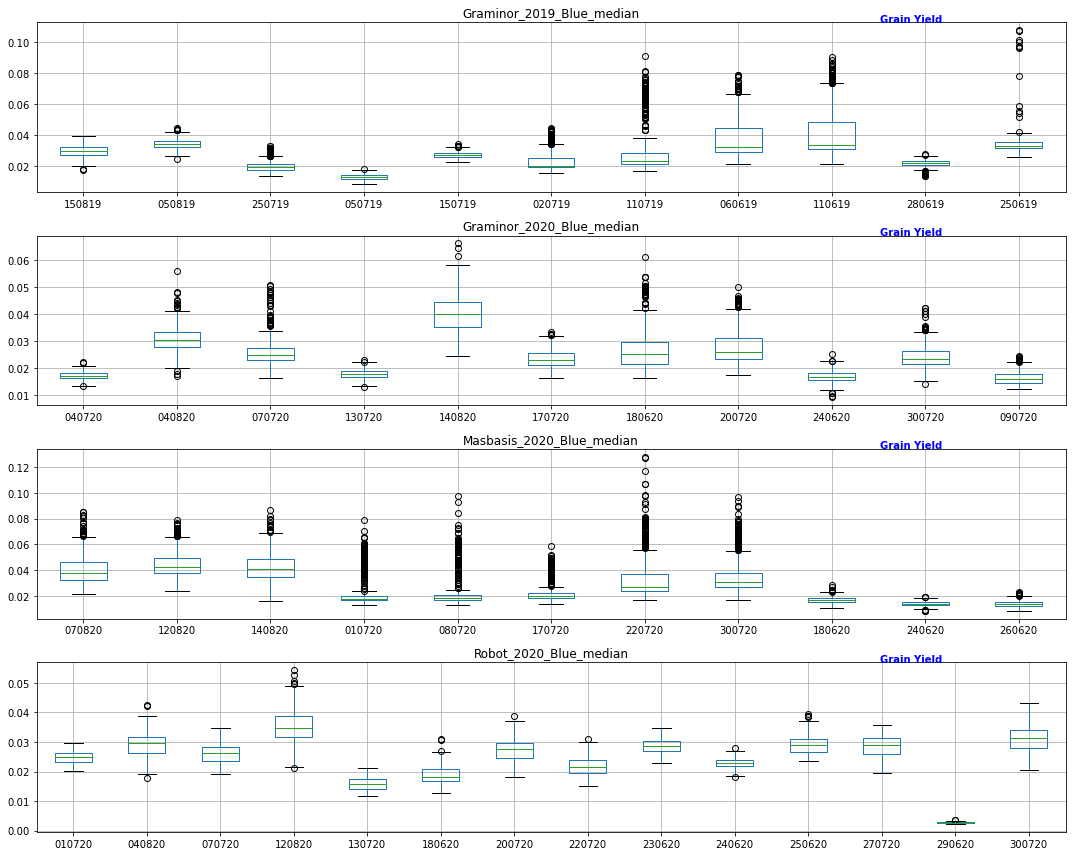

In [58]:
# col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI']
# data_agg_list = ['_mean_full', '_median_full', '_stdev_full']

# data_agg_list = ['_mean_full']
data_agg_list = ['_median_full']
# data_agg_list = ['_stdev_full']
# col_for_plotting = general_col_names[1:]

col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']
# col_for_plotting = ['RedEdge']
# col_for_plotting = ['NIR']
# col_for_plotting = ['NDVI']
# col_for_plotting = ['MTCI']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fig, ax = plt.subplots(4,1, figsize=(15,12))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in field_year_dict.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                field_df = field_sample[:-5]+'_'+date+d_type
#                 print(field_df+'_'+col)
                temp_df[date] = locals()[field_df][col]
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict.keys())
            
            text = "Grain Yield"

            temp_df.boxplot(ax=plots[n])
            x_labels = temp_df.columns.tolist()
            plots[n].set_xticklabels(x_labels, rotation=0)
            plots[n].set_title(field_sample+'_'+col+d_type[:-5])
            
            # Printing the grain yiels of the fiels_sample for reference
            plots[n].text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=plots[n].transAxes)
            n+=1
        plt.tight_layout()



### Check Trend in the data

## Normal Distribution of data

ToDo:  
see the dist of data if it is normal  
else make transpose to make it normal  
dist in Gausion function   
in each field  
what if the data is normal dist?  
the use some transpose to box pox   
try diff funct to see which one iis able to make data normal  
make heat map of whole if not normal  
see which parts are not normal and exculde them  
ls_means in R to make the normalisation/transpose  
pearson corr bw yield and indices for diff dates  


### Identify Dates and index with problems

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Take average of data for date 20200708 and 20200624  
Masbasis  
Cleanup  
Remove dates which have drop  

## Remove outliers

### Find AUC for all dates of one field
See if it covers tha gaps under the dates,i.e.

Since data points are different  
Flying time is different  
Cover the gaps between the dates  

Since the data collection is not uniform throughout the year so AUC will give a single value instead of multiple values for one field year which will be representative of all the dates 

### Time series data vs the AUC

# Model Training


Make model for one year at a time and try to predict yield of another field  

TODO: Train on Masbasis 2019 an 2020  
Test on Staur  

Use data until august for yield prediction since it is most relavant  
Use all data for predicting date to maturity  

Data Collection:  
Data collection usually starts after heading  
2019 has the data before hading as well. To use that, dont use dates before heading  

NDVI is resistant to shadows  

DAT390 Report: Do the report with Robot Data only  

TODO: Use AUC for each index for prediction  

TODO:   
Time series data vs the AUC  

In [ ]:
M_180620_MICA_MEAN_1 = pd.DataFrame(M_180620_MICA_MEAN,columns=['Blue', 'Green', 'Red','RedEdge', 'NIR','NDVI', 'MTCI'])
M_180620_MICA_MEAN_1

from sklearn.preprocessing import PowerTransformer 

pt = PowerTransformer(method='box-cox', standardize=False)
M_180620_MICA_MEAN_PT = pt.fit_transform(M_180620_MICA_MEAN_1)

M_180620_MICA_MEAN_PT

In [ ]:

2019,
2020
Masbasis
Use AUC


In [ ]:
M_180620_MICA_MEAN_1 = pd.DataFrame(M_180620_MICA_MEAN,columns=['Blue', 'Green', 'Red','RedEdge', 'NIR','NDVI', 'MTCI'])
M_180620_MICA_MEAN.boxplot(figsize=(10,6))


In [ ]:
####concating all dates in one file
Masbasis_Mica_2020_all_dates_mean=pd.concat([M_180620_MICA_MEAN,M_240620_MICA_MEAN, M_260620_MICA_MEAN, M_010720_MICA_MEAN,
                                            M_080720_MICA_MEAN,M_130720_MICA_MEAN,M_170720_MICA_MEAN, M_220720_MICA_MEAN,
                                             M_300720_MICA_MEAN, M_070820_MICA_MEAN, M_120820_MICA_MEAN, M_140820_MICA_MEAN],axis=0, sort=True)
Masbasis_Mica_2020_all_dates_mean.to_excel('Masbasis_Mica_2020_all_dates_mean.xlsx')

In [ ]:
####concating all dates in one file
Masbasis_Mica_2020_all_dates_MEDIAN=pd.concat([M_180620_MICA_MEDIAN,M_240620_MICA_MEDIAN, M_260620_MICA_MEDIAN, M_010720_MICA_MEDIAN,
                                            M_080720_MICA_MEDIAN,M_130720_MICA_MEDIAN,M_170720_MICA_MEDIAN, M_220720_MICA_MEDIAN,
                                             M_300720_MICA_MEDIAN, M_070820_MICA_MEDIAN, M_120820_MICA_MEDIAN, M_140820_MICA_MEDIAN],axis=0, sort=True)
Masbasis_Mica_2020_all_dates_MEDIAN.to_excel('Masbasis_Mica_2020_all_dates_MEDIAN.xlsx')


In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','NDVI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','NIR']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','MTCI_CI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Blue']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','MTCI']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Green']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','Red']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','RedEdge']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
import matplotlib.pyplot as plt
Masbasis_Mica_2020_all_dates_MEDIAN[['Time','EXG']].boxplot(by='Time', figsize=(10,6))
plt.xticks(rotation=90)

In [ ]:
Df=pd.read_excel('Masbasis_Mica_2020_all_dates_MEDIAN.xlsx')